In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import pandas as pd

In [5]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
data['MEDV'] = pd.DataFrame(boston.target)

In [7]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
pd.DataFrame(data.corr().round(2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [9]:
x = data['RM']
y = data['MEDV']


In [10]:
pd.DataFrame([x,y]).transpose().head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [12]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(y_pred,y_test)))


6.558968002760445


In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

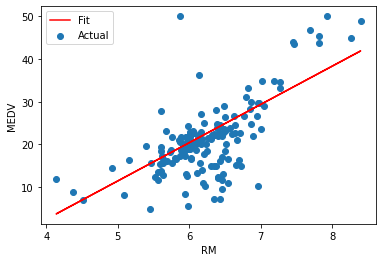

In [17]:
plt.scatter(x_test,y_test,label='Actual')
plt.plot(x_test,y_pred,color='red',label='Fit')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

In [18]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [19]:
data = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
data['Target'] = pd.DataFrame(diabetes.target)

In [20]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [21]:
print(data.corr().round(2))

         age   sex   bmi    bp    s1    s2    s3    s4    s5    s6  Target
age     1.00  0.17  0.19  0.34  0.26  0.22 -0.08  0.20  0.27  0.30    0.19
sex     0.17  1.00  0.09  0.24  0.04  0.14 -0.38  0.33  0.15  0.21    0.04
bmi     0.19  0.09  1.00  0.40  0.25  0.26 -0.37  0.41  0.45  0.39    0.59
bp      0.34  0.24  0.40  1.00  0.24  0.19 -0.18  0.26  0.39  0.39    0.44
s1      0.26  0.04  0.25  0.24  1.00  0.90  0.05  0.54  0.52  0.33    0.21
s2      0.22  0.14  0.26  0.19  0.90  1.00 -0.20  0.66  0.32  0.29    0.17
s3     -0.08 -0.38 -0.37 -0.18  0.05 -0.20  1.00 -0.74 -0.40 -0.27   -0.39
s4      0.20  0.33  0.41  0.26  0.54  0.66 -0.74  1.00  0.62  0.42    0.43
s5      0.27  0.15  0.45  0.39  0.52  0.32 -0.40  0.62  1.00  0.46    0.57
s6      0.30  0.21  0.39  0.39  0.33  0.29 -0.27  0.42  0.46  1.00    0.38
Target  0.19  0.04  0.59  0.44  0.21  0.17 -0.39  0.43  0.57  0.38    1.00
